<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/Vehinhmuatheomua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
out_dirs=['out_fig_mua','out_tab_mua']
for out_dir in out_dirs:
  if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


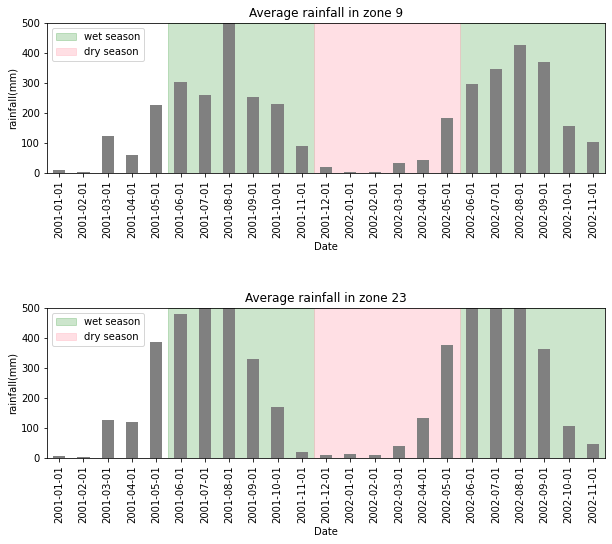

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/out_tabs/mean.csv')
district_list_name=data.columns
# detemine datetime_var
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
data['Date']=data['Date'].dt.date # remove hours minutes seconds
data=data.sort_values(by='Date') #sort data

# Creating the plots
data.shape
data1=data.iloc[7:7+23,0:] # 3 years recently
n=11 # North China
m=25 # South VietNam
# from matplotlib.gridspec import GridSpec
# gs=GridSpec(nrows=2,ncols=1)
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,8))


# mua kho tu thang 2 den thang 5
#https://www.mrcmekong.org/about/mekong-basin/climate/
# ve mua mua
index_begin=5 # June begin rain season Yang et al. 2019
index_end=10 # September end rain season Yang et al. 2019
np_arr_start=np.arange(index_begin,len(data1),12)
np_arr_end=np.arange(index_end,len(data1),12)
for k in range(len(np_arr_end)):
        dry=ax1.axvspan(np_arr_start[k]-0.5, np_arr_end[k]+0.5, alpha=0.2, color='green')
        ax2.axvspan(np_arr_start[k]-0.5, np_arr_end[k]+0.5, alpha=0.2, color='green')
# ve mua kho
index_begin_dry=11 # June begin rain season Yang et al. 2019
index_end_dry=16 # September end rain season Yang et al. 2019
np_arr_start_dry=np.arange(index_begin_dry,len(data1),12)
np_arr_end_dry=np.arange(index_end_dry,len(data1),12)
for k in range(len(np_arr_end_dry)):
        rain=ax1.axvspan(np_arr_start_dry[k]-0.5, np_arr_end_dry[k]+0.5, alpha=0.5, color='pink')
        ax2.axvspan(np_arr_start_dry[k]-0.5, np_arr_end_dry[k]+0.5, alpha=0.5, color='pink')
data1.plot(x='Date',y=district_list_name[n],kind='bar',ax=ax1,
           title='Average rainfall in zone '+ district_list_name[n],
           color='gray',
           grid=False)
ax1.set_ylabel("rainfall(mm)")
ax1.legend(handles=[dry,rain],labels=['wet season','dry season'])

# # ve mua lanh
# index_begin_cold=10 # June begin rain season Yang et al. 2019
# index_end_cold=14 # September end rain season Yang et al. 2019
# np_arr_start_cold=np.arange(index_begin_cold,len(data1),12)
# np_arr_end_cold=np.arange(index_end_cold,len(data1),12)
# for k in range(len(np_arr_end_cold)):
#         ax1.axvspan(np_arr_start_cold[k]-0.5, np_arr_end_cold[k]+0.5, alpha=0.2, color='gray')
#         ax2.axvspan(np_arr_start_cold[k]-0.5, np_arr_end_cold[k]+0.5, alpha=0.2, color='gray')

ax1.set_ylim([0,500])

data1.plot(x='Date',y=district_list_name[m],kind='bar',ax=ax2,
           title='Average rainfall in zone '+ district_list_name[m],
           color='gray',
           grid=False)
ax2.set_ylabel("rainfall(mm)")
# ax2.legend(['rainy season','wet season'])
ax2.legend(handles=[dry,rain],labels=['wet season','dry season'])
ax2.set_ylim([0,500])
# plt.tight_layout()
# plt.tight_layout()
plt.subplots_adjust(hspace=0.9) # scale horizontal

plt.savefig(out_dirs[0]+'/'+'Fig6.tif',dpi=300,bbox_inches='tight')